# <center>L2 Computational Physics</center>
---

## Gradient Descent

In this notebook, you shall illustrate the different behaviours of the gradient descent (GD) method when finding the minima of 
*Rosenbrock's Banana Function*,

$$f(x,y) \equiv (1-x)^{2} + 100(y-x^{2})^{2}~.$$

You will generate a plot demonstrating how the behaviour of the GD method changes with different values of the step-size parameter, $\eta$. To do this, you will plot example GD trajectories using three different $\eta$ values. 

In [3]:
import numpy
from matplotlib import pyplot as plt
import matplotlib.colors
from random import random

First, define the functions `f` and `grad` which implement the *banana* function and its **analytical** derivative. 
`r` is a two component array of coordinates.

In [4]:
def f(r):
    '''Function to be minimised'''
    x, y = r
    # YOUR CODE HERE
    f = (1 - x**2) + 100*(y - x**2)**2 #this is the above formula
    return f
    
def grad(r):
    '''Calculate gradient of banana function at coordinates r = (x,y)'''
    x, y = r
    # YOUR CODE HERE
    gradx = -2*(1-x) - 400*x*(y-x**2) #this is both the x and y components of the gradient
    grady = 200*(y - x**2)
    gradf = numpy.array([gradx, grady])
    return gradf

Before proceeding, ensure that your functions have been written correctly:

In [5]:
# these tests are worth 2 marks 
r = numpy.array([1, 4])
assert numpy.isclose(f(r), 900)
assert numpy.isclose(grad(r), numpy.array([-1200,   600])).all()

Implement the function `gradientDescent`. It takes as argument:

- `df`: the derivative of the the function you want to minimize
- `r0`: an array of two initial values where the algorithm starts
- `eta`: the step size
- `nstep`: the number of steps

It should return the history of points visited, including the initial one.

In [8]:
def gradientDescent(df, r0, eta, nstep):
    x,y = r0
    history = numpy.empty( (nstep+1, 2) )
    # YOUR CODE HERE
    history[0][0] = x #this sets the x and y in the correct starting points
    history[0][1] = y 
    
    for i in (range(nstep)):     
        history[i+1]= history[i]- eta*(df(history[i])) #this is the formula for gradient descent
        
    return history
    return history


Test your answer:

In [9]:
# these tests are worth 3 marks 
gdtest = gradientDescent(grad, [0.3,0.4], 0.01, 2)
assert gdtest.shape == (3,2)
assert numpy.isclose(gdtest, numpy.array([
        [ 0.3       ,  0.4       ],
        [ 0.686     , -0.22      ],
        [-1.20271542,  1.161192  ]])).all()

## Plotting task

Create a plot to show the trajectory of the gradient descent optimisation algorithm for different values of $\eta$. Use the values of $\eta$ provided. Start all trajectories at $r_0=(0.2,1)$. [3 marks]

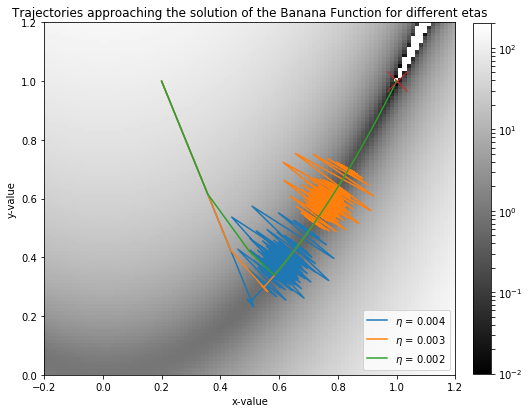

In [11]:
# Generate banana function
N = 100 # Resolution of 2D image
x0 = -0.2
x1 = 1.2
y0 = 0
y1 = 1.2
xs = numpy.linspace(x0, x1, N)
ys = numpy.linspace(y0, y1, N)
dat = numpy.zeros((N, N))

for ix, x in enumerate(xs):
    for iy, y in enumerate(ys):
        r = [x,y]
        dat[iy, ix] = f(r)

plt.figure(figsize=(8,8))
im = plt.imshow(dat, extent=(x0, x1, y0, y1), origin='lower', cmap=matplotlib.cm.gray, 
                norm=matplotlib.colors.LogNorm(vmin=0.01, vmax=200))
plt.colorbar(im, orientation='vertical', fraction=0.03925, pad=0.04)

# Now generate the trajectories:
gammas = [0.004, 0.003, 0.002]  # Gammas to try out
r0 = numpy.array([0.2, 1])  # Initial seed point

for gamma in gammas:
    path=gradientDescent(grad, r0,gamma, 100000) #this calls the gradient descent function for different etas and 100000 steps
    xval, yval = path[:,0], path[:,1] #this defines which column is x and which is y and creates a path made up of history values
    plt.plot(xval,yval, label='$\eta$ = %s'%gamma) #this plots the trajecotry
plt.legend(loc='lower right') #this calls the legend
plt.ylabel('y-value') #this labels the y-axis
plt.xlabel('x-value') #this labels the x-axis
plt.title('Trajectories approaching the solution of the Banana Function for different etas') #this adds a title
plt.plot(1,1, 'x', ms=20) #this is the point of the solution
#is this supposed to be at 1,1

Which of the three step size $\eta$ is best? Use the box below to justify your answer. [2 marks]

0.002 oscillates the least and reaches the point 1,1 the quickest